## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Import the dataset

In [2]:
data_frame = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [3]:
data_frame.shape

(541909, 8)

In [4]:
data_frame.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check for the missing values

In [6]:
data_frame.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [7]:
data_frame[data_frame.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [8]:
print(data_frame['InvoiceDate'].dtype)
data_frame['InvoiceDate'] = pd.to_datetime(data_frame['InvoiceDate'], format='%m/%d/%Y %H:%M')
print(data_frame['InvoiceDate'].dtype)

object
datetime64[ns]


In [9]:
data_frame_no_mv = data_frame.dropna()
data_frame_no_mv.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data_frame_no_mv['CustomerID'] = data_frame_no_mv['CustomerID'].astype('int64')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data_frame_no_mv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [12]:
data_frame_no_mv.shape

(406829, 8)

In [13]:
data_frame_no_mv.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [14]:
# We can see negative values in the quantity which seems to be odd. Since quantity cant have negative values, we are removing it.

# Box plots divide the data into sections that each contain approximately 25% of the data in that set. 
# Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

<AxesSubplot:ylabel='Quantity'>

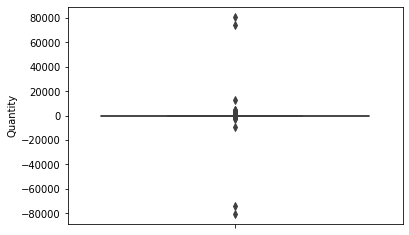

In [15]:
sns.boxplot(y=data_frame_no_mv['Quantity'])

In [16]:
data_frame_no_mv = data_frame_no_mv[data_frame_no_mv['Quantity']>0]
data_frame_no_mv.shape

(397924, 8)

<AxesSubplot:ylabel='Quantity'>

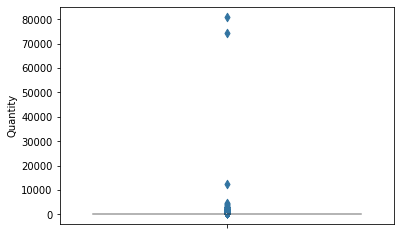

In [17]:
sns.boxenplot(y=data_frame_no_mv['Quantity'])

In [18]:
# Calculating amount spent and storing result to AmountSpent column

In [19]:
data_frame_no_mv['AmountSpent'] = data_frame_no_mv['Quantity']*data_frame_no_mv['UnitPrice']
data_frame_no_mv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# Creating MonthYear, Year, Month, Day, DayOfWeek, DayOfYear, WeekOfYear, Quarter columns from Invoice Date for further analysis

In [21]:
data_frame_no_mv['MonthYear'] = data_frame_no_mv['InvoiceDate'].dt.to_period('M')
data_frame_no_mv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [22]:
data_frame_no_mv['Day'] = data_frame_no_mv['InvoiceDate'].dt.day
data_frame_no_mv['Month'] = data_frame_no_mv['InvoiceDate'].dt.month
data_frame_no_mv['Year'] = data_frame_no_mv['InvoiceDate'].dt.year
data_frame_no_mv['DayOfWeek'] = data_frame_no_mv['InvoiceDate'].dt.dayofweek
data_frame_no_mv['DayOfYear'] = data_frame_no_mv['InvoiceDate'].dt.dayofyear
data_frame_no_mv['WeekOfYear'] = data_frame_no_mv['InvoiceDate'].dt.weekofyear
data_frame_no_mv['Quarter'] = data_frame_no_mv['InvoiceDate'].dt.quarter

In [23]:
data_frame_no_mv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,1,12,2010,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,1,12,2010,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,2,335,48,4


In [24]:
# Here by default dayofweek gives Monday as 0 ... Sunday as 6
# Therfore need to fix this --> Monday as 1 ... Sunday as 7

In [25]:
data_frame_no_mv['DayOfWeek'] = data_frame_no_mv['DayOfWeek']+1
data_frame_no_mv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,1,12,2010,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,1,12,2010,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,1,12,2010,3,335,48,4


## Exploring and Analysing the Data

In [26]:
# Consolidating the number of sales made per customer for each country
# We use InvoiceNo as the count for sales

In [27]:
sales_per_customer = data_frame_no_mv.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_customer.columns=['CustomerID', 'Country', 'NumberOfSales']
sales_per_customer.head()

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


In [28]:
# Visualizing No. of Sales per Customer

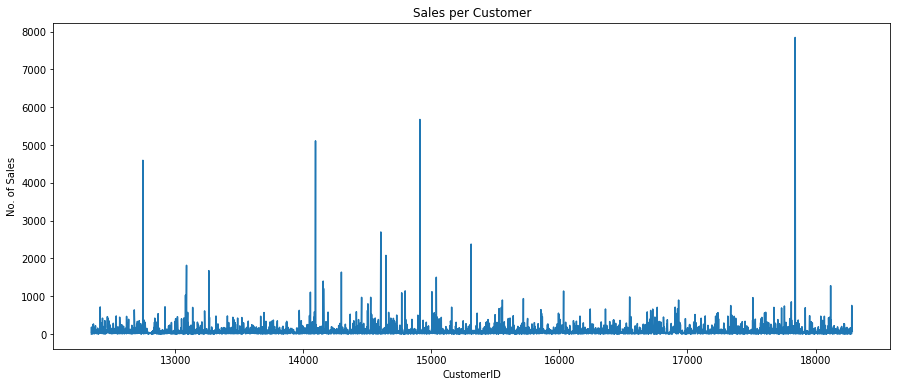

In [29]:
orders_per_customer = data_frame_no_mv.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.figure(figsize=(15,6))
plt.plot(orders_per_customer['CustomerID'], orders_per_customer['InvoiceNo'])
plt.title('Sales per Customer')
plt.xlabel('CustomerID')
plt.ylabel('No. of Sales')
plt.show()

In [30]:
# Consolidating the total amount spent by each customer(Revenue)

In [31]:
amount_spent_by_customer = data_frame_no_mv.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
amount_spent_by_customer.columns = ['CustomerID', 'Country', 'TotalAmountSpent']
amount_spent_by_customer.head()

,CustomerID,Country,TotalAmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [32]:
# Visualizing total money spent by each customer

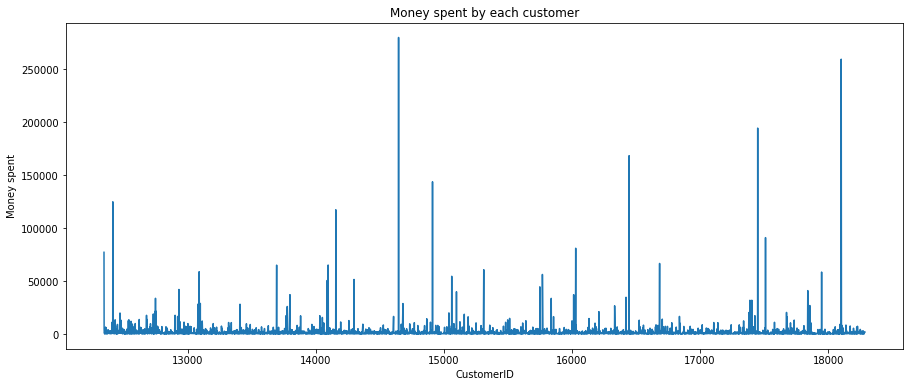

In [33]:
money_spent_by_customer = data_frame_no_mv.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()
plt.figure(figsize=(15,6))
plt.plot(money_spent_by_customer['CustomerID'], money_spent_by_customer['AmountSpent'])
plt.title('Money spent by each customer')
plt.xlabel('CustomerID')
plt.ylabel('Money spent')
plt.show()

# Purchasing Patterns

In [34]:
# Plot that shows the number of orders per month of the year

In [35]:
sales_per_month = data_frame_no_mv.groupby('MonthYear')['InvoiceNo'].nunique()
sales_per_month

MonthYear
2010-12    1400
2011-01     987
2011-02     998
2011-03    1321
2011-04    1149
2011-05    1555
2011-06    1393
2011-07    1331
2011-08    1281
2011-09    1756
2011-10    1929
2011-11    2658
2011-12     778
Freq: M, Name: InvoiceNo, dtype: int64

Text(0, 0.5, 'No. of Sales')

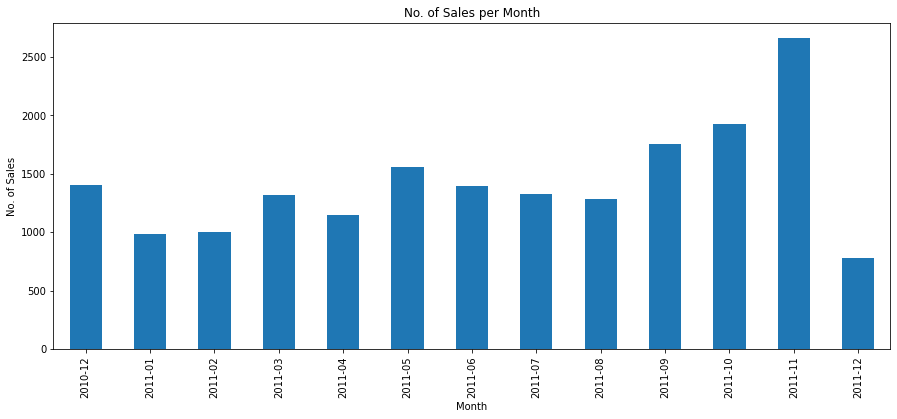

In [36]:
sales_per_month_plot = sales_per_month.plot.bar(figsize=(15,6))
sales_per_month_plot.set_title("No. of Sales per Month")
sales_per_month_plot.set_xlabel("Month")
sales_per_month_plot.set_ylabel("No. of Sales")

In [37]:
# Plot that shows the number of orders per day of the week

In [38]:
sales_per_day_of_week = data_frame_no_mv.groupby('DayOfWeek')['InvoiceNo'].nunique()
sales_per_day_of_week

DayOfWeek
1    2863
2    3185
3    3455
4    4033
5    2831
7    2169
Name: InvoiceNo, dtype: int64

Text(0, 0.5, 'No. of Sales')

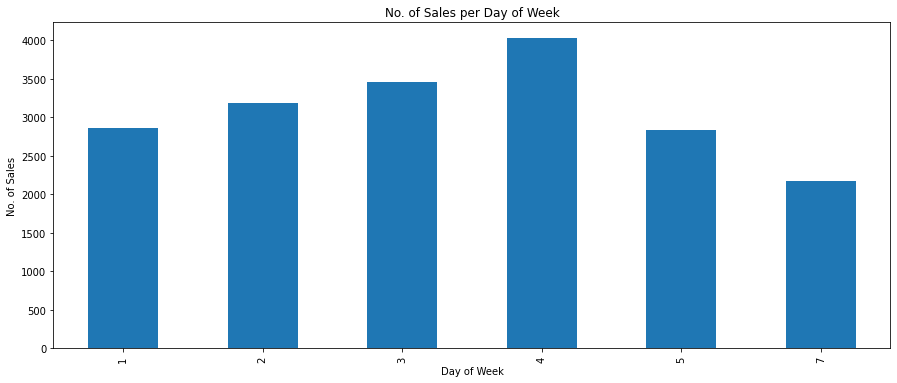

In [39]:
sales_per_day_of_week_plot = sales_per_day_of_week.plot.bar(figsize=(15,6))
sales_per_day_of_week_plot.set_title("No. of Sales per Day of Week")
sales_per_day_of_week_plot.set_xlabel("Day of Week")
sales_per_day_of_week_plot.set_ylabel("No. of Sales")

In [40]:
# Plot that shows the number of orders per hour

In [41]:
data_frame_no_mv['Hour'] = data_frame_no_mv['InvoiceDate'].dt.hour
sales_per_hour = data_frame_no_mv.groupby('Hour')['InvoiceDate'].nunique()
sales_per_hour

Hour
6        1
7       29
8      536
9     1316
10    2074
11    2128
12    2864
13    2420
14    2098
15    1920
16    1039
17     536
18     164
19     143
20      18
Name: InvoiceDate, dtype: int64

Text(0, 0.5, 'No. of Sales')

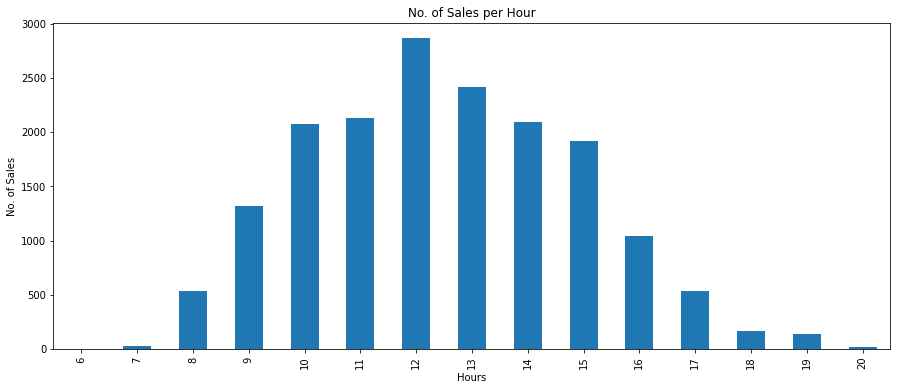

In [42]:
sales_per_hour_plot = sales_per_hour.plot.bar(figsize=(15,6))
sales_per_hour_plot.set_title("No. of Sales per Hour")
sales_per_hour_plot.set_xlabel("Hours")
sales_per_hour_plot.set_ylabel("No. of Sales")

In [43]:
# Plot that shows the number of sales per week of the year

In [44]:
sales_per_week = data_frame_no_mv.groupby('WeekOfYear')['InvoiceDate'].nunique()
sales_per_week

WeekOfYear
1     215
2     221
3     200
4     254
5     265
6     190
7     256
8     258
9     256
10    257
11    294
12    286
13    307
14    277
15    324
16    233
17    183
18    317
19    356
20    403
21    297
22    222
23    349
24    321
25    288
26    244
27    290
28    288
29    308
30    304
31    282
32    240
33    295
34    331
35    239
36    345
37    322
38    406
39    398
40    441
41    402
42    391
43    466
44    467
45    552
46    599
47    538
48    948
49    881
50    377
51    103
Name: InvoiceDate, dtype: int64

Text(0, 0.5, 'No. of Sales')

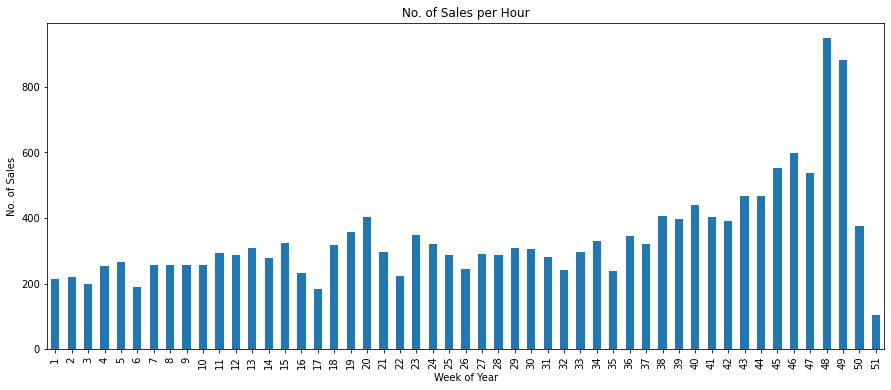

In [45]:
sales_per_week_plot = sales_per_week.plot.bar(figsize=(15,6))
sales_per_week_plot.set_title("No. of Sales per Hour")
sales_per_week_plot.set_xlabel("Week of Year")
sales_per_week_plot.set_ylabel("No. of Sales")

# Analyze Unit Prices of our items

In [46]:
data_frame_no_mv['UnitPrice'].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

<AxesSubplot:xlabel='UnitPrice'>

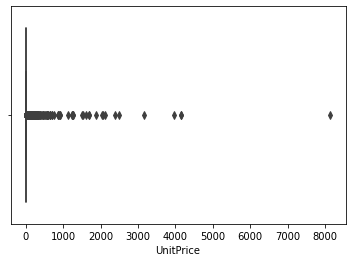

In [47]:
sns.boxplot(data_frame_no_mv['UnitPrice'])

In [48]:
# In the box plot, we can see some items were given out for free
free_items = data_frame_no_mv[data_frame_no_mv['UnitPrice']==0]
print(len(free_items))
free_items.head()

40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,MonthYear,Day,Month,Year,DayOfWeek,DayOfYear,WeekOfYear,Quarter,Hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,5,12,2010,7,339,48,4,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,16,12,2010,4,350,50,4,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,21,12,2010,2,355,51,4,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,6,1,2011,4,6,1,1,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,6,1,2011,4,6,1,1,16


In [49]:
# Checking when these free items were given out
free_items['MonthYear'].value_counts()

2011-11    14
2011-08     6
2011-10     3
2011-01     3
2010-12     3
2011-09     2
2011-07     2
2011-05     2
2011-04     2
2011-03     2
2011-02     1
Freq: M, Name: MonthYear, dtype: int64

In [50]:
free_items_month = free_items['MonthYear'].value_counts().sort_index()
free_items_month

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: MonthYear, dtype: int64

Text(0, 0.5, 'No. of Free Items')

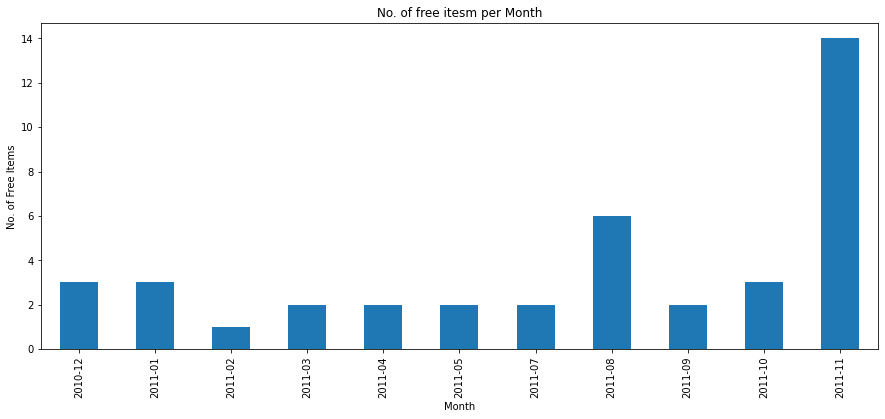

In [51]:
free_items_month_plot = free_items_month.plot.bar(figsize=(15,6))
free_items_month_plot.set_title("No. of free itesm per Month")
free_items_month_plot.set_xlabel("Month")
free_items_month_plot.set_ylabel("No. of Free Items")

# Analysis per Country

In [52]:
sales_per_country = data_frame_no_mv.groupby('Country')['InvoiceNo'].nunique().sort_values()
sales_per_country

Country
Lebanon                     1
Brazil                      1
RSA                         1
Saudi Arabia                1
Bahrain                     2
Czech Republic              2
United Arab Emirates        3
European Community          4
Lithuania                   4
Israel                      5
Greece                      5
Malta                       5
USA                         5
Canada                      6
Singapore                   7
Iceland                     7
Unspecified                 8
Cyprus                     16
Austria                    17
Denmark                    18
Poland                     19
Japan                      19
Channel Islands            26
Sweden                     36
Norway                     36
Italy                      38
Finland                    41
Switzerland                51
Portugal                   57
Australia                  57
Spain                      90
Netherlands                95
Belgium                    98
EI

Text(0, 0.5, 'No. of Sales')

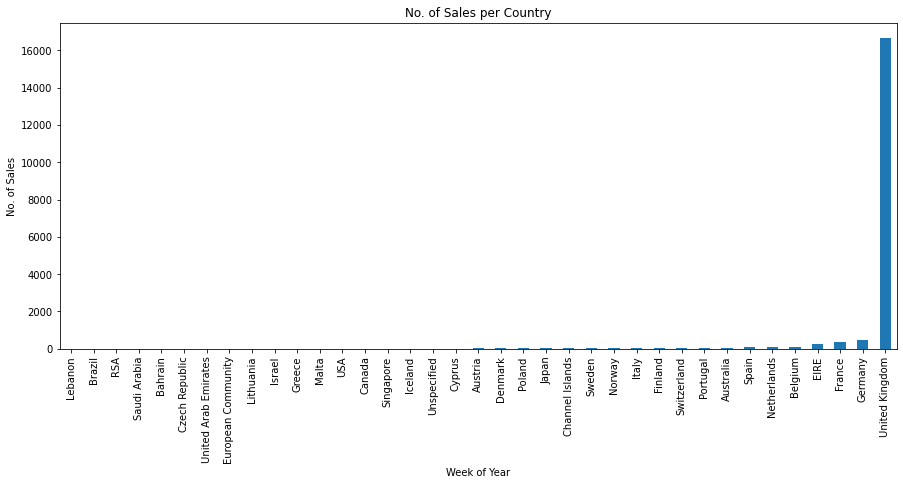

In [53]:
sales_per_country_plot = sales_per_country.plot.bar(figsize=(15,6))
sales_per_country_plot.set_title("No. of Sales per Country")
sales_per_country_plot.set_xlabel("Week of Year")
sales_per_country_plot.set_ylabel("No. of Sales")

In [54]:
#For better visualization of other countries, exclusing UK

In [55]:
sales_per_country_without_UK = sales_per_country.copy()
del sales_per_country_without_UK['United Kingdom']
sales_per_country_without_UK

Country
Lebanon                   1
Brazil                    1
RSA                       1
Saudi Arabia              1
Bahrain                   2
Czech Republic            2
United Arab Emirates      3
European Community        4
Lithuania                 4
Israel                    5
Greece                    5
Malta                     5
USA                       5
Canada                    6
Singapore                 7
Iceland                   7
Unspecified               8
Cyprus                   16
Austria                  17
Denmark                  18
Poland                   19
Japan                    19
Channel Islands          26
Sweden                   36
Norway                   36
Italy                    38
Finland                  41
Switzerland              51
Portugal                 57
Australia                57
Spain                    90
Netherlands              95
Belgium                  98
EIRE                    260
France                  389
Germany     

Text(0, 0.5, 'No. of Sales')

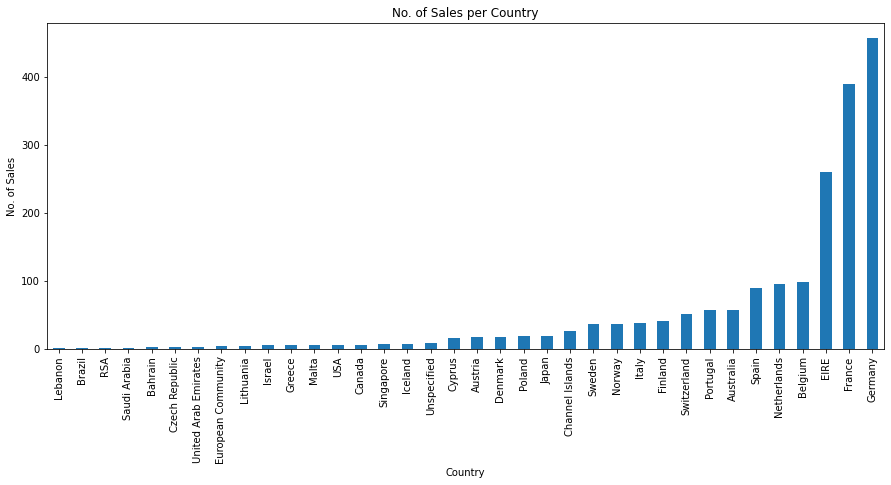

In [56]:
sales_per_country_without_UK_plot = sales_per_country_without_UK.plot.bar(figsize=(15,6))
sales_per_country_without_UK_plot.set_title("No. of Sales per Country")
sales_per_country_without_UK_plot.set_xlabel("Country")
sales_per_country_without_UK_plot.set_ylabel("No. of Sales")

In [57]:
# Amount spent by each country (without UK)

In [58]:
amount_spent_each_country = data_frame_no_mv.groupby('Country')['AmountSpent'].sum().sort_values()
del amount_spent_each_country['United Kingdom']
amount_spent_each_country

Country
Saudi Arabia               145.92
Bahrain                    548.40
Czech Republic             826.74
RSA                       1002.31
Brazil                    1143.60
European Community        1300.25
Lithuania                 1661.06
Lebanon                   1693.88
United Arab Emirates      1902.28
Unspecified               2667.07
Malta                     2725.59
USA                       3580.39
Canada                    3666.38
Iceland                   4310.00
Greece                    4760.52
Israel                    7221.69
Poland                    7334.65
Austria                  10198.68
Cyprus                   13590.38
Italy                    17483.24
Denmark                  18955.34
Channel Islands          20450.44
Singapore                21279.29
Finland                  22546.08
Portugal                 33439.89
Norway                   36165.44
Japan                    37416.37
Sweden                   38378.33
Belgium                  41196.34
Switze

Text(0, 0.5, 'Amount spent')

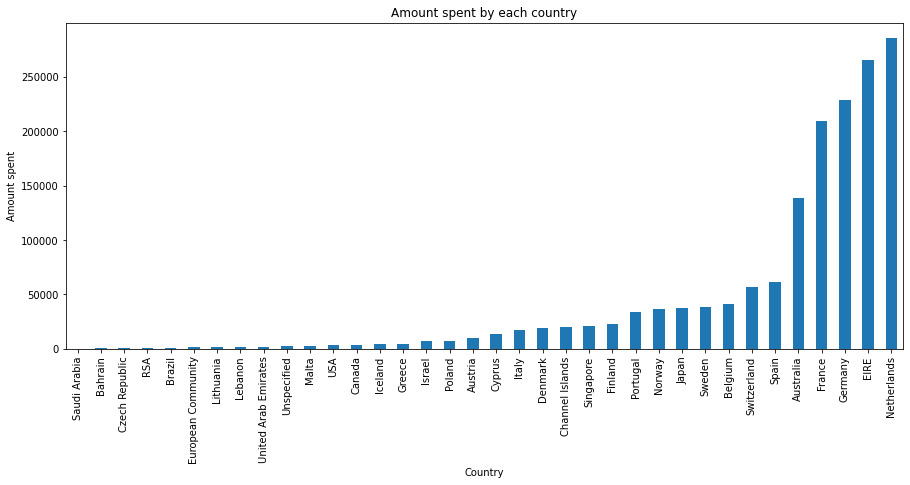

In [59]:
amount_spent_each_country_plot = amount_spent_each_country.plot.bar(figsize=(15,6))
amount_spent_each_country_plot.set_title("Amount spent by each country")
amount_spent_each_country_plot.set_xlabel("Country")
amount_spent_each_country_plot.set_ylabel("Amount spent")

# Repeat Customers

In [60]:
invoice_customer_df = data_frame_no_mv.groupby(by=['InvoiceNo','InvoiceDate'], as_index=False).agg({'AmountSpent':sum, 'CustomerID':max, 'Country':max})
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [61]:
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
18533,581483,2011-12-09 09:15:00,168469.60,16446,United Kingdom
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia


In [62]:
# No of repeat customers we have in each month?

# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)


In [63]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [64]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: M, Name: CustomerID, dtype: int64

In [65]:
# No of unique customers we have in each month?

In [66]:
monthly_unique_customers_df = data_frame_no_mv.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
2011-12-31     615
Freq: M, Name: CustomerID, dtype: int64

In [67]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
2011-12-31    17.235772
Freq: M, Name: CustomerID, dtype: float64

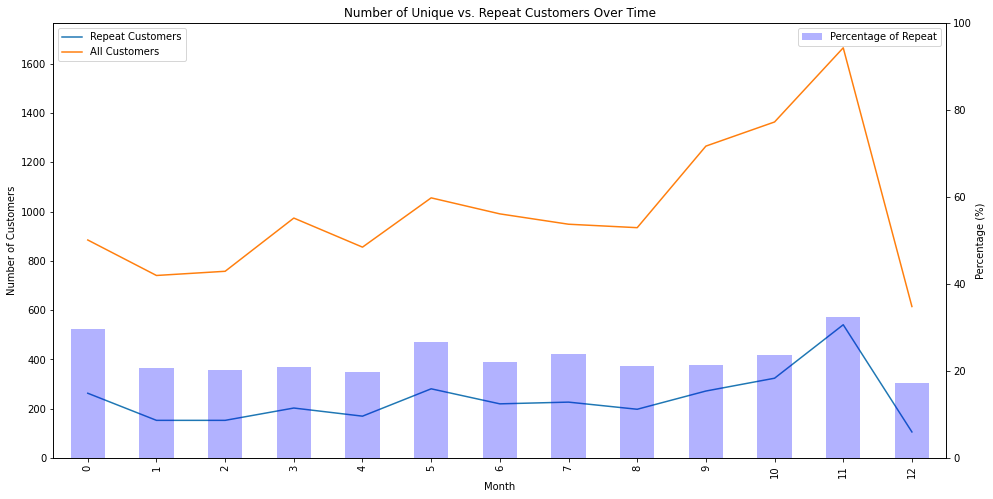

In [68]:
ax1 = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(16,8))
pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax1)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax1,secondary_y=True,color='blue',alpha=0.3)

ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('Percentage (%)')

ax1.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax1.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.show()

In [69]:
# Relationship between revenue and repeat customers

In [70]:
monthly_revenue_df = data_frame_no_mv.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
2011-12-31     518192.790
Freq: M, Name: AmountSpent, dtype: float64

In [71]:
monthly_revenue_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']
monthly_revenue_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
2011-12-31    146833.97
Freq: M, Name: AmountSpent, dtype: float64

In [72]:
# Percentage of the revenue from repeat customers to the overall monthly revenue
monthly_revenue_repeat_customers_perc_df = monthly_revenue_repeat_customers_df/monthly_revenue_df * 100.0
monthly_revenue_repeat_customers_perc_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
2011-12-31    28.335780
Freq: M, Name: AmountSpent, dtype: float64

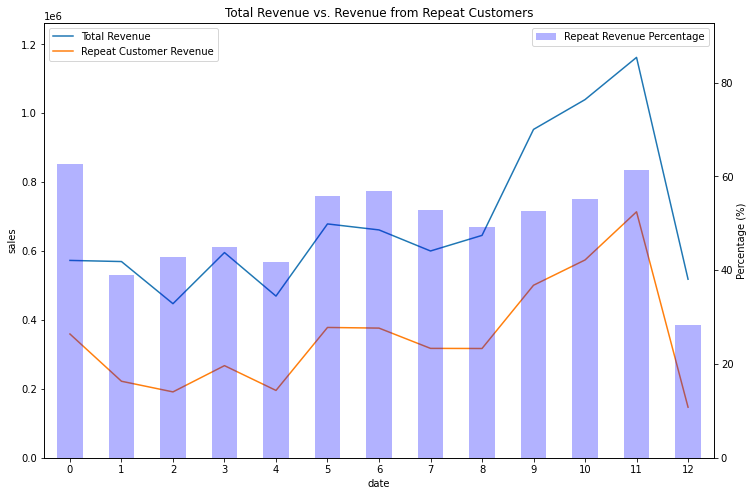

In [73]:
ax1 = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))
pd.DataFrame(monthly_revenue_repeat_customers_df.values).plot(ax=ax1)

ax2 = ax1.twinx()
pd.DataFrame(monthly_revenue_repeat_customers_perc_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax1.set_xlabel('date')
ax1.set_ylabel('sales')
ax1.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax1.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax1.set_ylim([0, (max(monthly_revenue_df.values)+100000)])

ax2.set_ylim([0, max(monthly_revenue_repeat_customers_perc_df.values)+30])
ax2.set_ylabel('Percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])


# Item Trends

In [74]:
# Number of items sold for each product for each period.

In [75]:
items_date_df = data_frame_no_mv.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
items_date_df

InvoiceDate  StockCode   
2010-12-31   10002           224
             10120            16
             10123C            1
             10124A            4
             10124G            5
                            ... 
2011-12-31   BANK CHARGES      1
             C2                3
             DOT               1
             M               819
             POST            123
Name: Quantity, Length: 30407, dtype: int64

In [76]:
# No of item sold on 2011-11-30

last_month_sorted_df = items_date_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


In [77]:
# Top 5 items sale per month

In [78]:
items_date_df = data_frame_no_mv.loc[data_frame_no_mv['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
items_date_df.head()

InvoiceDate  StockCode
2010-12-31   22086        1697
             22197        2110
             84826         366
             85099B       2056
2011-01-31   22197        1697
Name: Quantity, dtype: int64